**Set environment**

In [43]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
library("fgsea")
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



In [18]:
txt_region = "fcc_astarr_macs_input_overlap"
txt_fdiry  = file.path(FD_RES, "region_integration", txt_region)
txt_fname  = "result.coverage.ranknorm.whg.tsv"
txt_fpath  = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)
dat_region_score_starrmpra_ranknorm = dat

print(dim(dat))
fun_display_table(head(dat, 3))

[1] 60618     5


Region,ASTARR,LMPRA,WSTARR,Mean
chr1:100036895-100039189,0.9032466,0.9352832,0.9627008,0.9337436
chr1:100048290-100048918,0.0495727,0.0133706,0.0349896,0.0326443
chr1:100050225-100050529,0.7499258,0.0718681,0.8012307,0.5410082


In [19]:
dat = dat_region_score_starrmpra_ranknorm
dat = dat %>% dplyr::arrange(Mean)

VEC_TXT_REGION = dat$Region
VEC_TXT_ASSAY  = c("ASTARR", "WSTARR", "LMPRA")
head(dat, 3)

Region,ASTARR,LMPRA,WSTARR,Mean
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chr11:119493738-119494104,0.0013692303,0.002458016,0.0002804448,0.001369230
chr12:109020860-109021302,0.0003629285,0.003612788,0.0051469860,0.003040901
chr2:112821224-112821459,0.0018641328,0.008182388,0.0003959220,0.003480814


In [15]:
dat = dat_region_starrmpra_ranknorm
dat = dat %>%
    dplyr::select(-Mean) %>%
    tidyr::gather(Assay, Score, -Region) %>% 
    dplyr::mutate(
        Assay  = factor(Assay,  levels=VEC_TXT_ASSAY),
        Region = factor(Region, levels=VEC_TXT_REGION),
    )

dat_region_score = dat
print(dim(dat))
head(dat)

[1] 181854      3


Region,Assay,Score
<fct>,<fct>,<dbl>
chr1:100036895-100039189,ASTARR,0.90324656
chr1:100048290-100048918,ASTARR,0.04957273
chr1:100050225-100050529,ASTARR,0.74992576
chr1:100132375-100133491,ASTARR,0.98051734
chr1:10015258-10016191,ASTARR,0.34964862
chr1:100248956-100250290,ASTARR,0.80720248


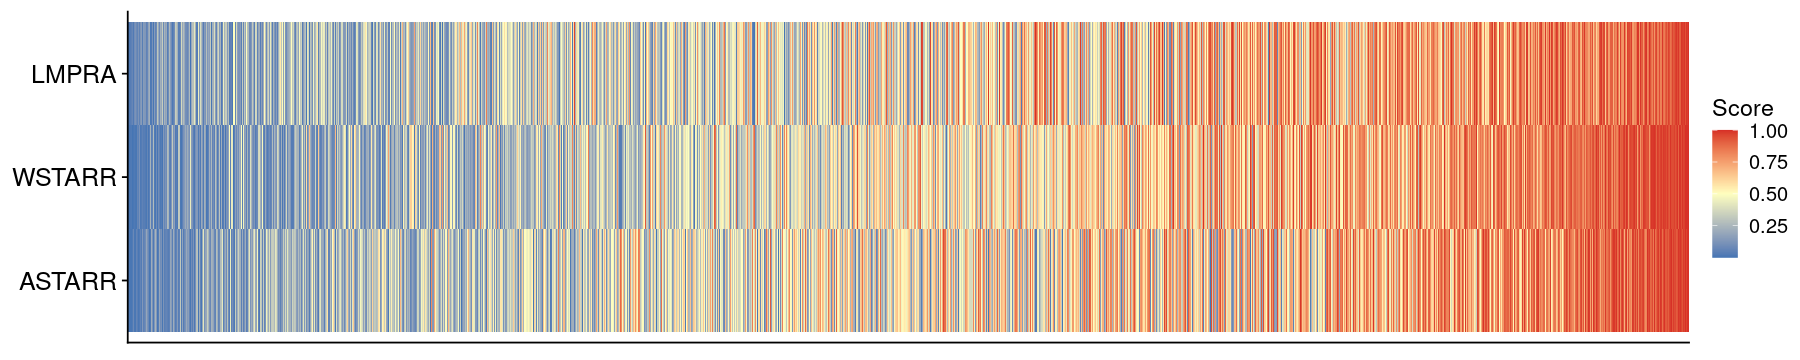

In [16]:
theme_fill = scale_fill_gradient2(
    low  = "#4575b4",
    mid  = "#ffffbf",
    high = "#d73027",
    midpoint = 0.5
)

theme_text = theme(
    axis.ticks.x = element_blank(),
    axis.text.x  = element_blank(),
    axis.text.y  = element_text(size = 15),
    #axis.title.x = element_text(size = 20),
    axis.title.x = element_blank(),
    axis.title.y = element_blank()
)

theme_legend = theme(legend.position = "none")

dat = dat_region_score

gpt = ggplot(dat, aes(x=Region, y=Assay, fill=Score)) +
    geom_tile() +
    labs(x="Open Chromatin Regions") +
    theme_cowplot() + 
    theme_text +
    theme_fill

gpt_score_starrmpra = gpt + theme(legend.position = "none")

options(repr.plot.height=3, repr.plot.width=15)
print(gpt)

In [26]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "result.summary.tfmodule.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_annot_tfmodule = dat
head(dat)

Chrom,ChromStart,ChromEnd,Region,Group,Label
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,115429,115969,chr1:115429-115969,TF_Module,Module_02
chr1,115429,115969,chr1:115429-115969,TF_Module,Module_05
chr1,115429,115969,chr1:115429-115969,TF_Module,Module_10
chr1,115429,115969,chr1:115429-115969,TF_Module,Module_44
chr1,136201,137353,chr1:136201-137353,TF_Module,Module_27
chr1,138321,139517,chr1:138321-139517,TF_Module,Module_02


In [37]:
dat = dat_region_score_starrmpra_ranknorm
dat = dat %>% dplyr::select(Region, Mean)
colnames(dat) = c("Region", "Score")

vec = dat$Score
names(vec) = dat$Region

dat_region_score = dat
vec_region_score = vec

print(dim(dat))
head(dat, 3)

[1] 60618     2


Region,Score
<chr>,<dbl>
chr1:100036895-100039189,0.93374355
chr1:100048290-100048918,0.03264432
chr1:100050225-100050529,0.54100817


In [53]:
vec = vec_region_score
sum(vec > 0.5) / length(vec)

[1] 0.4803194

In [40]:
dat = dat_region_annot_tfmodule
lst = split(dat$Region, dat$Label)

lst_region_annot = lst
print(names(lst))

 [1] "Module_01" "Module_02" "Module_03" "Module_04" "Module_05" "Module_06"
 [7] "Module_07" "Module_08" "Module_09" "Module_10" "Module_11" "Module_12"
[13] "Module_13" "Module_14" "Module_15" "Module_16" "Module_17" "Module_18"
[19] "Module_19" "Module_20" "Module_21" "Module_22" "Module_23" "Module_24"
[25] "Module_25" "Module_26" "Module_27" "Module_28" "Module_29" "Module_30"
[31] "Module_31" "Module_33" "Module_34" "Module_35" "Module_36" "Module_37"
[37] "Module_39" "Module_40" "Module_41" "Module_42" "Module_43" "Module_44"
[43] "Module_45" "Module_46" "Module_47" "Module_48" "Module_49" "Module_50"
[49] "Module_51" "Module_52" "Module_53" "Module_54" "Module_55" "Module_56"
[55] "Module_57" "Module_58" "Module_59" "Module_61" "Module_63" "Module_64"
[61] "Module_65" "Module_66" "Module_67" "Module_68" "Module_71" "Module_72"
[67] "Module_73" "Module_74" "Module_75" "Module_77"


In [54]:
set.seed(123)
res = fgsea(
    pathways  = lst_region_annot, 
    stats     = vec_region_score - 0.5,
    scoreType = "std",
    eps       = 0
)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (7.93% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“There were 1 pathways for which P-values were not calculated properly due to unbalanced (positive and negative) gene-level statistic values. For such pathways pval, padj, NES, log2err are set to NA. You can try to increase the value of the argument nPermSimple (for example set it nPermSimple = 10000)”


In [ ]:
scoreType = "pos"

In [55]:
dat = res
dat = dat %>%
    dplyr::select(pathway, pval, padj, log2err, ES, NES, size)
head(dat)

pathway,pval,padj,log2err,ES,NES,size
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Module_01,5.920255e-112,2.402927e-111,2.768021,0.3488813,2.238566,4799
Module_02,NA,NA,NA,-0.3460024,NA,9682
Module_03,1.304673e-35,2.727953e-35,1.549878,0.3124394,1.963153,2303
Module_04,5.358140e-57,1.369302e-56,1.967838,0.3062335,1.955139,3959
Module_05,1.794637e-34,3.642058e-34,1.529705,0.3140958,1.968653,2141
Module_06,5.915164e-123,2.720976e-122,2.903125,0.3378740,2.176726,5964


In [58]:
lst = lst_region_annot
lst = lapply(lst, length)
vec = unlist(lst)
mean(vec)

[1] 3740.514

In [59]:
median(vec)

[1] 3650

In [60]:
set.seed(123)
res2 = fgsea(
    pathways  = lst_region_annot, 
    stats     = vec_region_score - 0.5,
    scoreType = "std",
    eps       = 0,
    sampleSize = 3740
)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (7.93% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“There were 1 pathways for which P-values were not calculated properly due to unbalanced (positive and negative) gene-level statistic values. For such pathways pval, padj, NES, log2err are set to NA. You can try to increase the value of the argument nPermSimple (for example set it nPermSimple = 10000)”


In [61]:
dat = res2
dat = dat %>%
    dplyr::select(pathway, pval, padj, log2err, ES, NES, size)
head(dat)

pathway,pval,padj,log2err,ES,NES,size
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Module_01,4.007230e-112,1.626464e-111,0.4543564,0.3488813,2.238566,4799
Module_02,NA,NA,NA,-0.3460024,NA,9682
Module_03,1.651872e-36,3.453915e-36,0.2573257,0.3124394,1.963153,2303
Module_04,1.173679e-56,2.999403e-56,0.3217112,0.3062335,1.955139,3959
Module_05,1.116332e-34,2.265498e-34,0.2507546,0.3140958,1.968653,2141
Module_06,7.131912e-123,3.280680e-122,0.4753054,0.3378740,2.176726,5964


In [62]:
txt_region = "fcc_astarr_macs_input_overlap"
txt_fdiry  = file.path(FD_RES, "region_integration", txt_region)
txt_fname  = "result.test.ranknom.module.gsea_v1.tsv"
txt_fpath  = file.path(txt_fdiry, txt_fname)

dat = res
write_tsv(dat, txt_fpath)

In [63]:
txt_region = "fcc_astarr_macs_input_overlap"
txt_fdiry  = file.path(FD_RES, "region_integration", txt_region)
txt_fname  = "result.test.ranknom.module.gsea_v2.tsv"
txt_fpath  = file.path(txt_fdiry, txt_fname)

dat = res2
write_tsv(dat, txt_fpath)

In [69]:
dat = res2
dat %>%
    dplyr::select(pathway, pval, padj, log2err, ES, NES, size)  %>% 
    dplyr::filter(is.na(log2err))

pathway,pval,padj,log2err,ES,NES,size
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Module_02,NA,NA,NA,-0.3460024,NA,9682


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_bin()`).”


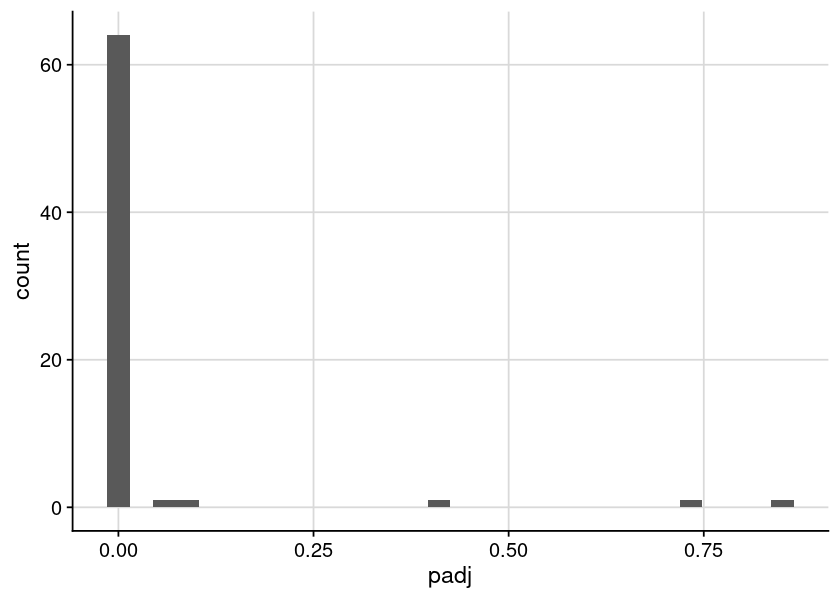

In [66]:
dat = res2
dat = dat %>%
    dplyr::select(pathway, pval, padj, log2err, ES, NES, size)

gpt = ggplot(dat, aes(x = padj)) +
    geom_histogram() +
    theme_cowplot() +
    background_grid()

options(repr.plot.height=5, repr.plot.width=7)
print(gpt)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_bin()`).”


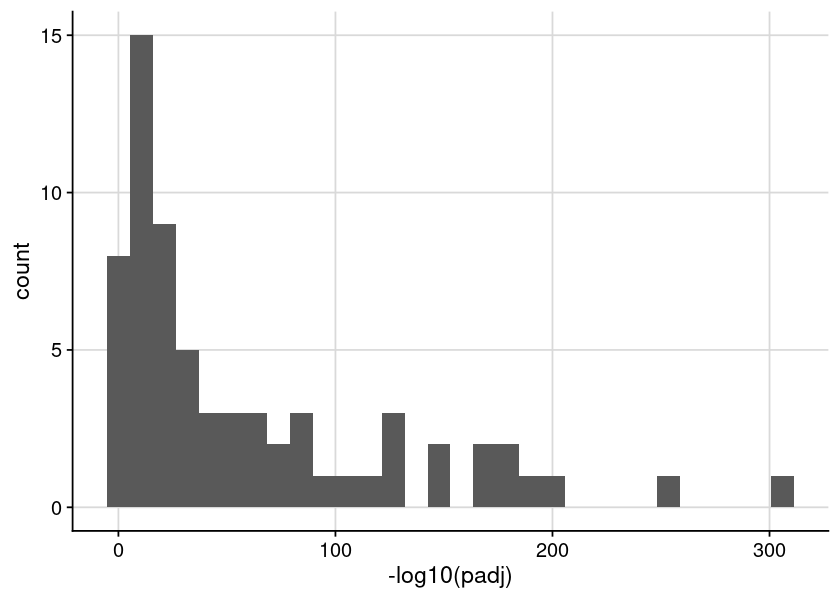

In [67]:
dat = res2
dat = dat %>%
    dplyr::select(pathway, pval, padj, log2err, ES, NES, size) 

gpt = ggplot(dat, aes(x = -log10(padj))) +
    geom_histogram() +
    theme_cowplot() +
    background_grid()

options(repr.plot.height=5, repr.plot.width=7)
print(gpt)

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


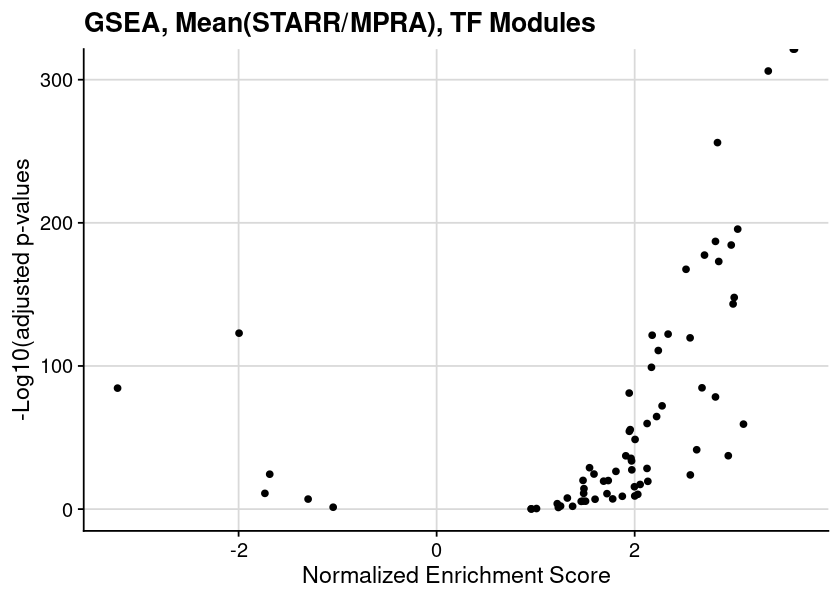

In [72]:
dat = res2
dat = dat %>%
    dplyr::select(pathway, pval, padj, log2err, ES, NES, size) 

gpt = ggplot(dat, aes(x = NES, y = -log10(padj))) +
    geom_point() +
    labs(
        x = "Normalized Enrichment Score", 
        y = "-Log10(adjusted p-values",
        title = "GSEA, Mean(STARR/MPRA), TF Modules"
    ) +
    theme_cowplot() +
    background_grid()

options(repr.plot.height=5, repr.plot.width=7)
print(gpt)

In [47]:
colnames(res)

[1] "pathway"     "pval"        "padj"        "log2err"     "ES"         
[6] "NES"         "size"        "leadingEdge"

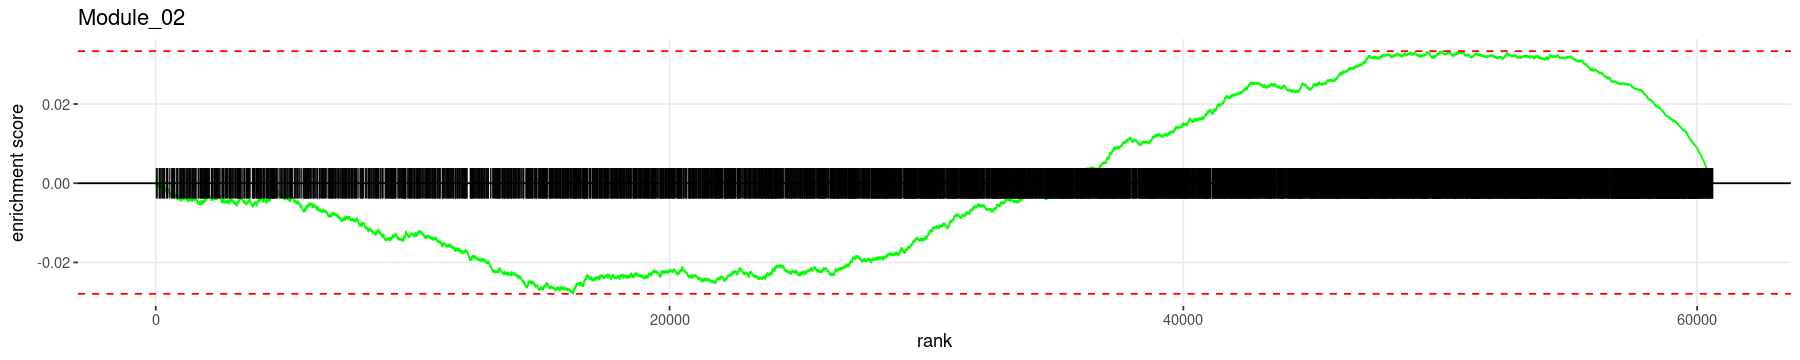

In [52]:
plotEnrichment(
    lst_region_annot[["Module_02"]],
    vec_region_score) + 
labs(title = "Module_02")

In [36]:
dat = dplyr::left_join(
    dat_region_score, 
    dat_region_annot, 
    by = c("Region")
)
dat = dat %>% replace(is.na(.), 0)

dat_region_merge = dat
print(dim(dat))
head(dat)

[1] 60618    72


Region,Score,Module_01,Module_02,Module_03,Module_04,Module_05,Module_06,Module_07,Module_08,⋯,Module_65,Module_66,Module_67,Module_68,Module_71,Module_72,Module_73,Module_74,Module_75,Module_77
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:100036895-100039189,0.93374355,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:100048290-100048918,0.03264432,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:100050225-100050529,0.54100817,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:100132375-100133491,0.91814588,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:10015258-10016191,0.16646046,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:100248956-100250290,0.72932407,1,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
